In [1]:
import pandas as pd

# Use exact file name after uploading
df = pd.read_csv("/content/new_event_feedback_dataset.csv")
df.head()


,Student Name,Event Rating,Liked About Event,Suggestions for Improvement
0,Aarav,5,Great speakers and well-organized,Add Q&A at the end
1,Diya,4,Good content but slightly long,Make it shorter
2,Rohan,2,Too boring and hard to follow,Better coordination
3,Megha,3,"Average event, nothing special",More activities
4,Siddharth,5,Amazing energy and interaction,NaN


In [2]:
from textblob import TextBlob

# Apply sentiment scoring
df['Sentiment Score'] = df['Liked About Event'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# View sentiment values
df[['Liked About Event', 'Sentiment Score']]


,Liked About Event,Sentiment Score
0,Great speakers and well-organized,0.800000
1,Good content but slightly long,0.325000
2,Too boring and hard to follow,-0.645833
3,"Average event, nothing special",0.103571
4,Amazing energy and interaction,0.600000
5,Well-presented and useful topics,0.300000
6,Waste of time,-0.200000
7,Could have had more interactive sessions,0.500000
8,Very informative and enjoyable,0.350000
9,Not well managed,0.000000


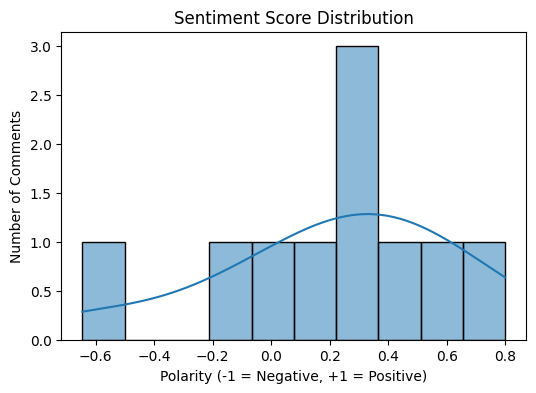

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['Sentiment Score'], bins=10, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Number of Comments")
plt.show()


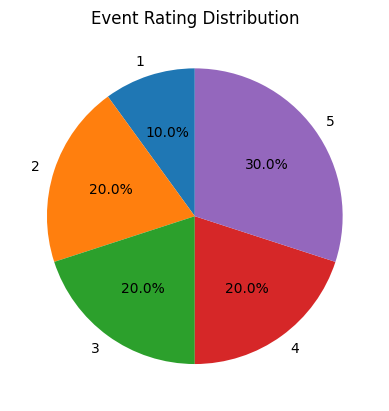

In [4]:
df['Event Rating'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Event Rating Distribution")
plt.ylabel("")
plt.show()


/tmp/ipython-input-743775072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Student Name", y="Event Rating", data=df, palette="viridis")


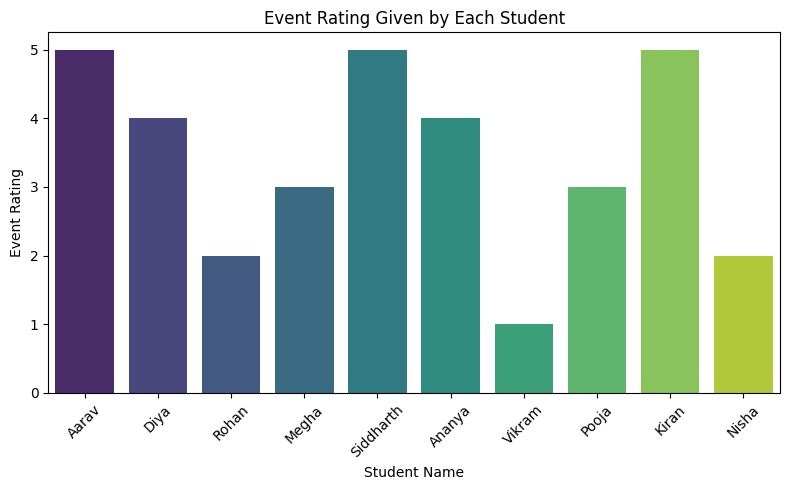

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x="Student Name", y="Event Rating", data=df, palette="viridis")
plt.title("Event Rating Given by Each Student")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


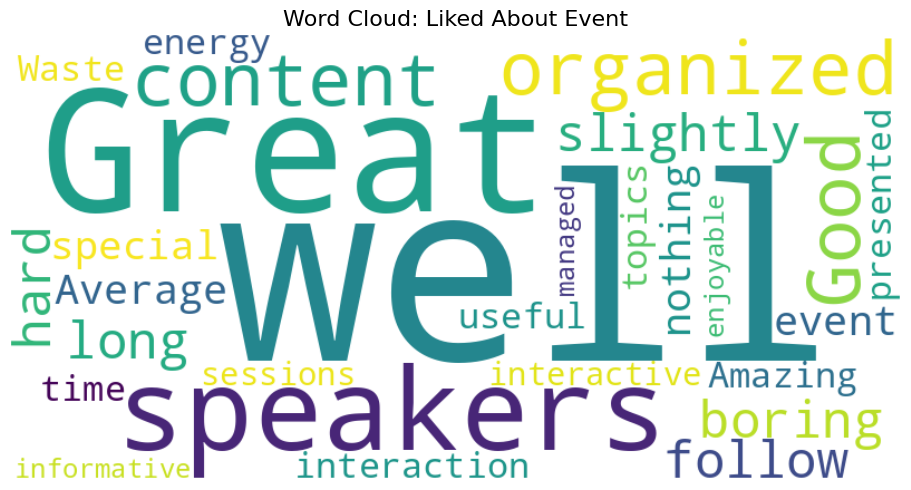

In [8]:
from wordcloud import WordCloud

text = ' '.join(df['Liked About Event'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Liked About Event", fontsize=16)
plt.tight_layout()
plt.show()


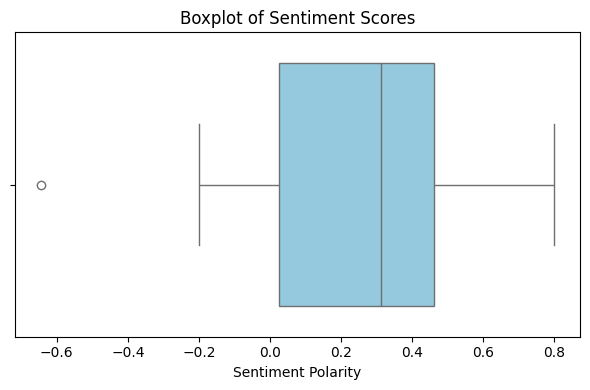

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sentiment Score"], color='skyblue')
plt.title("Boxplot of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.tight_layout()
plt.show()
